# House Prices: Advanced Regression Techniques
### [Link to Kaggle Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Workflow
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

### Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying:** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating:** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting:** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting:** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating:** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting:** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

# 1. Competition Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# 2. Acquire training and test data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost
from xgboost import XGBRegressor

# Feature selection
from boruta import BorutaPy



In [2]:
!pip freeze > requirements.txt

In [3]:
df_train = pd.read_csv('data/train.csv')  
df_test = pd.read_csv('data/test.csv')
combine = [df_train, df_test]

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
df_test.shape

(1459, 80)

In [7]:
df_test.sort_values(by='Id').head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [8]:
df_test.interpolate().isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt         0
GarageFinish       78
GarageCars          0
GarageArea          0
GarageQual         78
GarageCond

In [9]:
f = open("data/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 3. Feature Engineering

In [10]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Function to create ranges for continuous feature**

In [11]:
def create_ranges(max_value, min_value, value):
    #print(value)
    shifted_max_value = max_value + abs(min_value)
    shifted_value = value + abs(min_value)
    #print(type(shifted_max_value))
    #print(type(shifted_value))
    percentage = np.divide(shifted_value, shifted_max_value)
    #print(type(percentage))
    #print(percentage)
    output_range = int(round(percentage*10))
    #print(output_range)

    return output_range

## 3.1 MSSubClass 
Change feature values to be represented by number from 1 and up.

**Feature Description:**  
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
**Feature Engineering:**
Create a binary feature where 1 is 1 story and 0 is more than 1 story.

In [12]:
df_train.MSSubClass.isna().sum()

0

In [13]:
df_train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [14]:
one_story_nums = [20, 30, 40, 120]

def mssubclass_feateng(input):
    if input in one_story_nums:
        return 1
    else:
        return 0

In [15]:
df_train['MSSubClass_1story'] = df_train.apply(lambda x: mssubclass_feateng(x.MSSubClass), axis=1)
df_test['MSSubClass_1story'] = df_test.apply(lambda x: mssubclass_feateng(x.MSSubClass), axis=1)

In [16]:
df_train.MSSubClass_1story.value_counts()

0    764
1    696
Name: MSSubClass_1story, dtype: int64

In [17]:
df_train.MSSubClass_1story.value_counts()

0    764
1    696
Name: MSSubClass_1story, dtype: int64

In [18]:
df_train['MSSubClass_1story'] = df_train['MSSubClass_1story'].astype('category')
df_test['MSSubClass_1story'] = df_test['MSSubClass_1story'].astype('category')

In [19]:
df_train.drop('MSSubClass', axis=1, inplace=True)
df_test.drop('MSSubClass', axis=1, inplace=True)

df_train.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_1story
0,1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


## 3.2 MSZoning

**Feature Description:**  
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [20]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [21]:
df_test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [22]:
### Create dummies to handle categorical feature

In [23]:
df_train = pd.concat([df_train.drop('MSZoning', axis=1), pd.get_dummies(df_train['MSZoning'], prefix='MSZoning')], axis=1)
df_test = pd.concat([df_test.drop('MSZoning', axis=1), pd.get_dummies(df_test['MSZoning'], prefix='MSZoning')], axis=1)


In [24]:
df_train.head()

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_1story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,208500,0,0,0,0,1,0
1,2,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,181500,1,0,0,0,1,0
2,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,223500,0,0,0,0,1,0
3,4,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,140000,0,0,0,0,1,0
4,5,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,250000,0,0,0,0,1,0


## 3.3 LotFrontage

In [25]:
df_train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [26]:
df_train.LotFrontage.isna().sum()

259

In [27]:
df_test.LotFrontage.isna().sum()

227

### Drop LotFrontage
Drop this feature as there are 259 NaNs which is close to 20% of the samples.

An alternative would be to estimate the LotFrontage based on the LotArea.

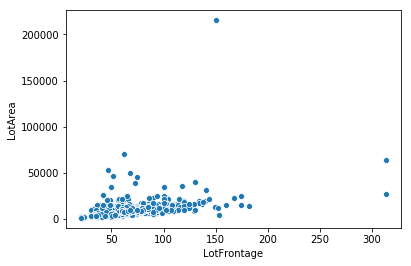

In [28]:
sns.scatterplot(x='LotFrontage', y='LotArea', data=df_train)

In [29]:
df_train.drop('LotFrontage', axis=1, inplace=True)
df_test.drop('LotFrontage', axis=1, inplace=True)

## 3.4 Lot Area

In [30]:
df_train.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

**Remove outliers**

In [31]:
df_train = df_train[df_train['LotArea'] < 150000]
df_test = df_test[df_test['LotArea'] < 150000]

In [32]:
df_train.LotArea.describe()

count      1457.000000
mean      10168.609472
std        6281.850623
min        1300.000000
25%        7540.000000
50%        9473.000000
75%       11600.000000
max      115149.000000
Name: LotArea, dtype: float64

## 3.5 Street
Drop this feature as 99.7% has the same value.

In [33]:
df_train.Street.value_counts()

Pave    1452
Grvl       5
Name: Street, dtype: int64

In [34]:
df_train.drop('Street', axis=1, inplace=True)
df_test.drop('Street', axis=1, inplace=True)

## 3.6 Alley

In [35]:
df_train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [36]:
df_train.Alley.isna().sum()

1366

**Drop Alley feature as 1366 of 1452 are NaNs**

In [37]:
df_train.drop('Alley', axis=1, inplace=True)
df_test.drop('Alley', axis=1, inplace=True)

## 3.7 LotShape

**Feature Description**  
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [38]:
df_train.LotShape.value_counts()

Reg    925
IR1    483
IR2     40
IR3      9
Name: LotShape, dtype: int64

In [39]:
df_train.LotShape.isna().sum()

0

**Replace LotShape with binary feature LotShape_regular**

In [40]:
df_train['LotShape_regular'] = df_train.apply(lambda x: 1 if x.LotShape == "Reg" else 0, axis=1)
df_test['LotShape_regular'] = df_test.apply(lambda x: 1 if x.LotShape == "Reg" else 0, axis=1)

In [41]:
df_train.LotShape_regular.value_counts()

1    925
0    532
Name: LotShape_regular, dtype: int64

In [42]:
df_train.drop('LotShape', axis=1, inplace=True)
df_test.drop('LotShape', axis=1, inplace=True)

## 3.8 Land Contour
**Feature Description**  
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [43]:
df_train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      49
Low      34
Name: LandContour, dtype: int64

In [44]:
df_train.LandContour.isna().sum()

0

In [45]:
df_train['LandContour_level'] = df_train.apply(lambda x: 1 if "Lvl" in x.LandContour else 0, axis=1)
df_test['LandContour_level'] = df_test.apply(lambda x: 1 if "Lvl" in x.LandContour else 0, axis=1)


In [46]:
df_train.LandContour_level.value_counts()

1    1311
0     146
Name: LandContour_level, dtype: int64

In [47]:
df_train.drop('LandContour', axis=1, inplace=True)
df_test.drop('LandContour', axis=1, inplace=True)

## 3.9 Utilities
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [48]:
df_train.Utilities.value_counts()

AllPub    1456
NoSeWa       1
Name: Utilities, dtype: int64

**Drop this feature as all but one sample are the same**

In [49]:
df_train.drop('Utilities', axis=1, inplace=True)
df_test.drop('Utilities', axis=1, inplace=True)

## 3.10 LotConfig
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [50]:
df_train.LotConfig.value_counts()

Inside     1051
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [51]:
df_train.LotConfig.isna().sum()

0

In [52]:
df_train['LotConfig'] = df_train.apply(lambda x: x.LotConfig[:2] if "FR" in x.LotConfig else x.LotConfig, axis=1)
df_test['LotConfig'] = df_test.apply(lambda x: x.LotConfig[:2] if "FR" in x.LotConfig else x.LotConfig, axis=1)

In [53]:
df_train.LotConfig.value_counts()

Inside     1051
Corner      262
CulDSac      93
FR           51
Name: LotConfig, dtype: int64

In [54]:
df_train = pd.concat([df_train.drop('LotConfig', axis=1), pd.get_dummies(df_train['LotConfig'], prefix='LotConfig')], axis=1)
df_test = pd.concat([df_test.drop('LotConfig', axis=1), pd.get_dummies(df_test['LotConfig'], prefix='LotConfig')], axis=1)

## 3.11 LandSlope
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [55]:
df_train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      10
Name: LandSlope, dtype: int64

In [56]:
df_train.LandSlope.isna().sum()

0

In [57]:
df_train = pd.concat([df_train.drop('LandSlope', axis=1), pd.get_dummies(df_train['LandSlope'], prefix='LandSlope')], axis=1)
df_test = pd.concat([df_test.drop('LandSlope', axis=1), pd.get_dummies(df_test['LandSlope'], prefix='LandSlope')], axis=1)


## 3.12 Neighborhood
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [58]:
df_train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      36
ClearCr     27
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [59]:
df_train = pd.concat([df_train.drop('Neighborhood', axis=1), pd.get_dummies(df_train['Neighborhood'], prefix='Neighborhood')], axis=1)
df_test = pd.concat([df_test.drop('Neighborhood', axis=1), pd.get_dummies(df_test['Neighborhood'], prefix='Neighborhood')], axis=1)

## 3.13 MasVnrArea
MasVnrArea: Masonry veneer area in square feet

In [60]:
df_train.MasVnrArea.isna().sum()

8

**Set all NaN values to mean**

In [61]:
MasVnrArea_mean = df_train.MasVnrArea.mean()
MasVnrArea_mean

103.57418909592823

In [62]:
df_train['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)
df_test['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)

In [63]:
df_train.MasVnrArea.isna().sum()

0

## 3.14 Condition1: Proximity to various conditions
       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [64]:
df_train.Condition1.value_counts()

Norm      1257
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [65]:
df_train['Condition1_Norm'] = df_train.apply(lambda x: 1 if x.Condition1 =='Norm' else 0, axis=1)
df_test['Condition1_Norm'] = df_test.apply(lambda x: 1 if x.Condition1 =='Norm' else 0, axis=1)

In [66]:
df_train[['Condition1', 'Condition1_Norm']];

In [67]:
df_train.drop('Condition1', axis=1, inplace=True)
df_test.drop('Condition1', axis=1, inplace=True)

## 3.15 Condition2: Proximity to various conditions (if more than one is present)

       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [68]:
df_train.Condition2.value_counts()

Norm      1442
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [69]:
df_train.drop('Condition2', axis=1, inplace=True)
df_test.drop('Condition2', axis=1, inplace=True)

## 3.16 BldgType: Type of dwelling
       1Fam	  Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	 Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [70]:
df_train.BldgType.isna().sum()

0

In [71]:
df_train.BldgType.value_counts()

1Fam      1218
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

In [72]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BldgType, prefix='BldgType')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BldgType, prefix='BldgType')], axis=1)

In [73]:
df_train.drop('BldgType', axis=1, inplace=True)
df_test.drop('BldgType', axis=1, inplace=True)

## 3.17 HouseStyle: Style of dwelling
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	  Split Level

In [74]:
df_train.HouseStyle.value_counts()

1Story    725
2Story    445
1.5Fin    152
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [75]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.HouseStyle, prefix='HouseStyle')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.HouseStyle, prefix='HouseStyle')], axis=1)

In [76]:
df_train.drop('HouseStyle', axis=1, inplace=True)
df_test.drop('HouseStyle', axis=1, inplace=True)

## 3.18 OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [77]:
df_train.OverallQual.value_counts()

5     396
6     373
7     318
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [78]:
df_train.OverallQual.isna().sum()

0

In [79]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.OverallQual, prefix='OverallQual')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.OverallQual, prefix='OverallQual')], axis=1)

In [80]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1,8450,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,0
1,2,9600,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,0,0,0,0,0,1,0,0,0,0
2,3,11250,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,0
3,4,9550,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,1,0,0,0
4,5,14260,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0


## 3.19 OverallCond: Rates the overall condition of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [81]:
df_train.OverallCond.value_counts()

5    820
6    251
7    204
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [82]:
df_train.OverallCond.isna().sum()

0

In [83]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.OverallCond, prefix='OverallCond')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.OverallCond, prefix='OverallCond')], axis=1)

## 3.20 YearBuilt
Original construction date

In [84]:
def YearBuilt_ranges(year):
    if year <= 1900:
        built_range = 'pre_1900'
    elif year > 1900 and year <= 1925:
        built_range = '1900_1925'
    elif year > 1925 and year <= 1950:
        built_range = '1925_1950'
    elif year > 1950 and year <= 1975:
        built_range = '1950_1975'
    elif year > 1975 and year <= 2000:
        built_range = '1975_2000'
    elif year > 2000:
        built_range = 'post_2000'
        
    return built_range

In [85]:
df_train['YearBuilt_range'] = df_train.apply(lambda x: YearBuilt_ranges(x.YearBuilt), axis=1)
df_test['YearBuilt_range'] = df_test.apply(lambda x: YearBuilt_ranges(x.YearBuilt), axis=1)

In [86]:
df_train[['YearBuilt_range']];

In [87]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.YearBuilt_range, prefix='YearBuilt_range')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.YearBuilt_range, prefix='YearBuilt_range')], axis=1)

In [88]:
df_train['Age'] = df_train.apply(lambda x: 2010 - x.YearBuilt, axis=1)
df_test['Age'] = df_test.apply(lambda x: 2010 - x.YearBuilt, axis=1)

In [89]:
df_train.drop('YearBuilt', axis=1, inplace=True)
df_test.drop('YearBuilt', axis=1, inplace=True)

## 3.21 YearRemodAdd
Remodel date (same as construction date if no remodeling or additions)

In [90]:
df_train.YearRemodAdd.value_counts().head()

1950    178
2006     96
2007     76
2005     73
2004     62
Name: YearRemodAdd, dtype: int64

In [91]:
df_train['YearsSinceRemod'] = df_train.apply(lambda x: 2010 - x.YearRemodAdd, axis=1)
df_test['YearsSinceRemod']  = df_test.apply(lambda x: 2010 - x.YearRemodAdd, axis=1)

In [92]:
df_train.drop('YearRemodAdd', axis=1, inplace=True)
df_test.drop('YearRemodAdd', axis=1, inplace=True)

## 3.22 RoofStyle: Type of roof

       Flat	    Flat
       Gable	   Gable
       Gambrel	 Gabrel (Barn)
       Hip	     Hip
       Mansard	 Mansard
       Shed	    Shed

In [93]:
df_train.RoofStyle.value_counts()

Gable      1139
Hip         285
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [94]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.RoofStyle, prefix='RoofStyle')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.RoofStyle, prefix='RoofStyle')], axis=1)

In [95]:
df_train.drop('RoofStyle', axis=1, inplace=True)
df_test.drop('RoofStyle', axis=1, inplace=True)

## 3.23 RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [96]:
df_train.RoofMatl.value_counts()

CompShg    1431
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

**Remove feature as 98% of the samples are one category**

In [97]:
df_train.drop('RoofMatl', axis=1, inplace=True)
df_test.drop('RoofMatl', axis=1, inplace=True)

## 3.24 Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [98]:
df_train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    205
Plywood    107
CemntBd     61
BrkFace     49
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [99]:
df_train.Exterior1st.isna().sum()

0

In [100]:
def transform_Exterior1st(category):
    list_above100 = ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood']
    if category not in list_above100:
        return 'Other'
    else:
        return category

In [101]:
df_train['Exterior1st'] = df_train.apply(lambda x: transform_Exterior1st(x.Exterior1st), axis=1)

In [102]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.Exterior1st, prefix='Exterior1st')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Exterior1st, prefix='Exterior1st')], axis=1)

In [103]:
df_train.drop('Exterior1st', axis=1, inplace=True)
df_test.drop('Exterior1st', axis=1, inplace=True)

In [104]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng
0,1,8450,7,5,VinylSd,BrkFace,196.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,0,1,0
1,2,9600,6,8,MetalSd,None,0.0,TA,TA,CBlock,...,0,0,0,0,0,1,0,0,0,0
2,3,11250,7,5,VinylSd,BrkFace,162.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,0,1,0
3,4,9550,7,5,Wd Shng,None,0.0,TA,TA,BrkTil,...,0,0,0,0,0,0,0,0,0,1
4,5,14260,8,5,VinylSd,BrkFace,350.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,0,1,0


## 3.25 Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [105]:
df_train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    206
Wd Sdng    197
Plywood    141
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     24
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [106]:
df_train.Exterior2nd.isna().sum()

0

In [107]:
def transform_Exterior2nd(category):
    list_above100 = ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood']
    if category not in list_above100:
        return 'Other'
    else:
        return category

In [108]:
df_train['Exterior2nd'] = df_train.apply(lambda x: transform_Exterior2nd(x.Exterior2nd), axis=1)

In [109]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.Exterior2nd, prefix='Exterior2nd')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Exterior2nd, prefix='Exterior2nd')], axis=1)

In [110]:
df_train.drop('Exterior2nd', axis=1, inplace=True)
df_test.drop('Exterior2nd', axis=1, inplace=True)

## 3.26 MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [111]:
df_train.MasVnrType.value_counts(dropna=False)

None       862
BrkFace    445
Stone      128
BrkCmn      14
NaN          8
Name: MasVnrType, dtype: int64

In [112]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.MasVnrType, prefix='MasVnrType')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.MasVnrType, prefix='MasVnrType')], axis=1)

In [113]:
df_train.drop('MasVnrType', axis=1, inplace=True)
df_test.drop('MasVnrType', axis=1, inplace=True)

In [114]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1,8450,7,5,196.0,Gd,TA,PConc,Gd,TA,...,0,0,0,0,1,0,0,1,0,0
1,2,9600,6,8,0.0,TA,TA,CBlock,Gd,TA,...,0,1,0,0,0,0,0,0,1,0
2,3,11250,7,5,162.0,Gd,TA,PConc,Gd,TA,...,0,0,0,0,1,0,0,1,0,0
3,4,9550,7,5,0.0,TA,TA,BrkTil,TA,Gd,...,0,0,1,0,0,0,0,0,1,0
4,5,14260,8,5,350.0,Gd,TA,PConc,Gd,TA,...,0,0,0,0,1,0,0,1,0,0


## 3.27 MasVnrArea
    Masonry veneer area in square feet


In [115]:
df_train.MasVnrArea.describe()

count    1457.000000
mean      103.574189
std       180.456188
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

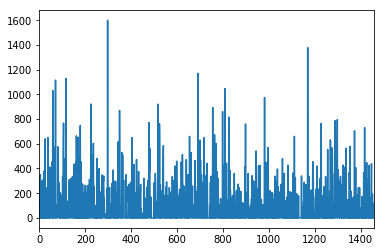

In [116]:
df_train.MasVnrArea.plot()

## 3.28 ExterQual: Evaluates the quality of the material on the exterior 
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [117]:
df_train.ExterQual.value_counts(dropna=False)

TA    904
Gd    487
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [118]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.ExterQual, prefix='ExterQual')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.ExterQual, prefix='ExterQual')], axis=1)

In [119]:
df_train.drop('ExterQual', axis=1, inplace=True)
df_test.drop('ExterQual', axis=1, inplace=True)

In [120]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,1,8450,7,5,196.0,TA,PConc,Gd,TA,No,...,1,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,0.0,TA,CBlock,Gd,TA,Gd,...,0,0,0,0,1,0,0,0,0,1
2,3,11250,7,5,162.0,TA,PConc,Gd,TA,Mn,...,1,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,0.0,TA,BrkTil,TA,Gd,No,...,0,0,0,0,1,0,0,0,0,1
4,5,14260,8,5,350.0,TA,PConc,Gd,TA,Av,...,1,0,0,1,0,0,0,0,1,0


## 3.29 ExterCond: Evaluates the present condition of the material on the exterior
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [121]:
df_train.ExterCond.value_counts(dropna=False)

TA    1279
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [122]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.ExterCond, prefix='ExterCond')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.ExterCond, prefix='ExterCond')], axis=1)

In [123]:
df_train.drop('ExterCond', axis=1, inplace=True)
df_test.drop('ExterCond', axis=1, inplace=True)

In [124]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,1,8450,7,5,196.0,PConc,Gd,TA,No,GLQ,...,0,0,0,1,0,0,0,0,0,1
1,2,9600,6,8,0.0,CBlock,Gd,TA,Gd,ALQ,...,0,0,0,0,1,0,0,0,0,1
2,3,11250,7,5,162.0,PConc,Gd,TA,Mn,GLQ,...,0,0,0,1,0,0,0,0,0,1
3,4,9550,7,5,0.0,BrkTil,TA,Gd,No,ALQ,...,0,0,0,0,1,0,0,0,0,1
4,5,14260,8,5,350.0,PConc,Gd,TA,Av,GLQ,...,0,0,0,1,0,0,0,0,0,1


## 3.30 Foundation: Type of foundation
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	 Poured Contrete	
       Slab	  Slab
       Stone	 Stone
       Wood	  Wood


In [125]:
df_train.Foundation.value_counts(dropna=False)

PConc     647
CBlock    631
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [126]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.Foundation, prefix='Foundation')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Foundation, prefix='Foundation')], axis=1)

In [127]:
df_train.drop('Foundation', axis=1, inplace=True)
df_test.drop('Foundation', axis=1, inplace=True)

In [128]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,8450,7,5,196.0,Gd,TA,No,GLQ,706,...,0,0,0,1,0,0,1,0,0,0
1,2,9600,6,8,0.0,Gd,TA,Gd,ALQ,978,...,0,0,0,1,0,1,0,0,0,0
2,3,11250,7,5,162.0,Gd,TA,Mn,GLQ,486,...,0,0,0,1,0,0,1,0,0,0
3,4,9550,7,5,0.0,TA,Gd,No,ALQ,216,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,350.0,Gd,TA,Av,GLQ,655,...,0,0,0,1,0,0,1,0,0,0


## 3.31 BsmtQual: Evaluates the height of the basement
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [129]:
df_train.BsmtQual.value_counts(dropna=False)

TA     648
Gd     616
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [130]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BsmtQual, prefix='BsmtQual')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BsmtQual, prefix='BsmtQual')], axis=1)

In [131]:
df_train.drop('BsmtQual', axis=1, inplace=True)
df_test.drop('BsmtQual', axis=1, inplace=True)

In [132]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,1,8450,7,5,196.0,TA,No,GLQ,706,Unf,...,0,0,1,0,0,0,0,0,1,0
1,2,9600,6,8,0.0,TA,Gd,ALQ,978,Unf,...,0,1,0,0,0,0,0,0,1,0
2,3,11250,7,5,162.0,TA,Mn,GLQ,486,Unf,...,0,0,1,0,0,0,0,0,1,0
3,4,9550,7,5,0.0,Gd,No,ALQ,216,Unf,...,1,0,0,0,0,0,0,0,0,1
4,5,14260,8,5,350.0,TA,Av,GLQ,655,Unf,...,0,0,1,0,0,0,0,0,1,0


## 3.32 BsmtCond: Evaluates the general condition of the basement
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [133]:
df_train.BsmtCond.value_counts(dropna=False)

TA     1308
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

**Drop as there are a big majority of TA and 37 NaN**

In [134]:
df_train.drop('BsmtCond', axis=1, inplace=True)
df_test.drop('BsmtCond', axis=1, inplace=True)

## 3.33 BsmtExposure: Refers to walkout or garden level walls
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [135]:
df_train.BsmtExposure.value_counts(dropna=False)

No     953
Av     221
Gd     131
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [136]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BsmtExposure, prefix='BsmtExposure')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BsmtExposure, prefix='BsmtExposure')], axis=1)

In [137]:
df_train.drop('BsmtExposure', axis=1, inplace=True)
df_test.drop('BsmtExposure', axis=1, inplace=True)

In [138]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,1,8450,7,5,196.0,GLQ,706,Unf,0,150,...,0,0,0,0,1,0,0,0,0,1
1,2,9600,6,8,0.0,ALQ,978,Unf,0,284,...,0,0,0,0,1,0,0,1,0,0
2,3,11250,7,5,162.0,GLQ,486,Unf,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,9550,7,5,0.0,ALQ,216,Unf,0,540,...,0,0,0,0,0,1,0,0,0,1
4,5,14260,8,5,350.0,GLQ,655,Unf,0,490,...,0,0,0,0,1,0,1,0,0,0


## 3.34 BsmtFinType1: Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [139]:
df_train.BsmtFinType1.value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    218
BLQ    148
Rec    132
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [140]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BsmtFinType1, prefix='BsmtFinType1')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BsmtFinType1, prefix='BsmtFinType1')], axis=1)

In [141]:
df_train.drop('BsmtFinType1', axis=1, inplace=True)
df_test.drop('BsmtFinType1', axis=1, inplace=True)

In [142]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
0,1,8450,7,5,196.0,706,Unf,0,150,856,...,0,0,0,1,0,0,1,0,0,0
1,2,9600,6,8,0.0,978,Unf,0,284,1262,...,0,1,0,0,1,0,0,0,0,0
2,3,11250,7,5,162.0,486,Unf,0,434,920,...,0,0,1,0,0,0,1,0,0,0
3,4,9550,7,5,0.0,216,Unf,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,350.0,655,Unf,0,490,1145,...,1,0,0,0,0,0,1,0,0,0


## 3.35 BsmtFinSF1: Type 1 finished square feet

In [143]:
df_train.BsmtFinSF1.describe()

count    1457.000000
mean      442.369252
std       455.556488
min         0.000000
25%         0.000000
50%       381.000000
75%       712.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [144]:
df_train.BsmtFinSF1.isna().sum()

0

In [145]:
df_test.BsmtFinSF1.isna().sum()

1

In [146]:
feature = 'BsmtFinSF1'
max_value = df_train[[feature]].max()[0]
min_value = df_train[[feature]].min()[0]

df_train[feature+'_range'] = df_train.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

**Fill NaN in test set**

In [147]:
df_test.BsmtFinSF1.isna().sum()

1

In [148]:
df_test.BsmtFinSF1.fillna(df_test.BsmtFinSF1.mean(), inplace=True)

In [149]:
feature = 'BsmtFinSF1'
max_value = df_test[[feature]].max()[0]
min_value = df_test[[feature]].min()[0]

df_test[feature+'_range'] = df_test.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

In [150]:
df_train.drop('BsmtFinSF1', axis=1, inplace=True)
df_test.drop('BsmtFinSF1', axis=1, inplace=True)

In [151]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_range
0,1,8450,7,5,196.0,Unf,0,150,856,GasA,...,0,0,1,0,0,1,0,0,0,1
1,2,9600,6,8,0.0,Unf,0,284,1262,GasA,...,1,0,0,1,0,0,0,0,0,2
2,3,11250,7,5,162.0,Unf,0,434,920,GasA,...,0,1,0,0,0,1,0,0,0,1
3,4,9550,7,5,0.0,Unf,0,540,756,GasA,...,0,0,1,1,0,0,0,0,0,0
4,5,14260,8,5,350.0,Unf,0,490,1145,GasA,...,0,0,0,0,0,1,0,0,0,1


## 3.36 BsmtFinType2: Rating of basement finished area (if multiple types)
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [152]:
df_train.BsmtFinType2.value_counts(dropna=False)

Unf    1255
Rec      53
LwQ      46
NaN      38
BLQ      32
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [153]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BsmtFinType2, prefix='BsmtFinType2')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BsmtFinType2, prefix='BsmtFinType2')], axis=1)

In [154]:
df_train.drop('BsmtFinType2', axis=1, inplace=True)
df_test.drop('BsmtFinType2', axis=1, inplace=True)

In [155]:
df_train.head()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_range,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,1,8450,7,5,196.0,0,150,856,GasA,Ex,...,0,0,0,1,0,0,0,0,0,1
1,2,9600,6,8,0.0,0,284,1262,GasA,Ex,...,0,0,0,2,0,0,0,0,0,1
2,3,11250,7,5,162.0,0,434,920,GasA,Ex,...,0,0,0,1,0,0,0,0,0,1
3,4,9550,7,5,0.0,0,540,756,GasA,Gd,...,0,0,0,0,0,0,0,0,0,1
4,5,14260,8,5,350.0,0,490,1145,GasA,Ex,...,0,0,0,1,0,0,0,0,0,1


## 3.37 BsmtFinSF2: Type 2 finished square feet

In [156]:
df_train.BsmtFinSF2.describe()

count    1457.000000
mean       45.981469
std       160.180891
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

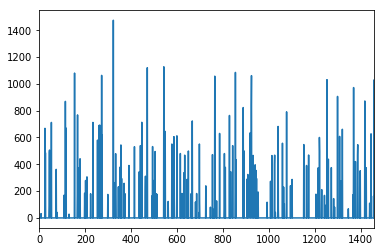

In [157]:
df_train.BsmtFinSF2.plot()

In [158]:
feature = 'BsmtFinSF2'
max_value = df_train[[feature]].max()[0]
min_value = df_train[[feature]].min()[0]

df_train[feature+'_range'] = df_train.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

**Fill NaN in test set**

In [159]:
df_test.BsmtFinSF2.isna().sum()

1

In [160]:
df_test.BsmtFinSF2.fillna(df_test.BsmtFinSF2.mean(), inplace=True)

In [161]:
feature = 'BsmtFinSF2'
max_value = df_test[[feature]].max()[0]
min_value = df_test[[feature]].min()[0]

df_test[feature+'_range'] = df_test.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

In [162]:
df_train.drop('BsmtFinSF2', axis=1, inplace=True)
df_test.drop('BsmtFinSF2', axis=1, inplace=True)

## 3.38 BsmtUnfSF: Unfinished square feet of basement area

In [163]:
df_train.BsmtUnfSF.describe()

count    1457.000000
mean      567.770075
std       441.944739
min         0.000000
25%       224.000000
50%       479.000000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

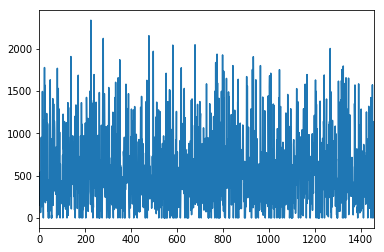

In [164]:
df_train.BsmtUnfSF.plot()

In [165]:
feature = 'BsmtUnfSF'
max_value = df_train[[feature]].max()[0]
min_value = df_train[[feature]].min()[0]

df_train[feature+'_range'] = df_train.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

**Fill NaN in test set**

In [166]:
df_test.BsmtUnfSF.isna().sum()

1

In [167]:
df_test.BsmtUnfSF.fillna(df_test.BsmtUnfSF.mean(), inplace=True)

In [168]:
feature = 'BsmtUnfSF'
max_value = df_test[[feature]].max()[0]
min_value = df_test[[feature]].min()[0]

df_test[feature+'_range'] = df_test.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

In [169]:
df_train.drop('BsmtUnfSF', axis=1, inplace=True)
df_test.drop('BsmtUnfSF', axis=1, inplace=True)

## 3.39 TotalBsmtSF: Total square feet of basement area

In [170]:
df_train.TotalBsmtSF.describe()

count    1457.000000
mean     1056.120796
std       437.974511
min         0.000000
25%       795.000000
50%       991.000000
75%      1296.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

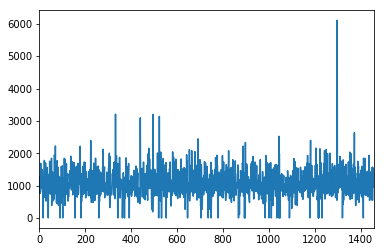

In [171]:
df_train.TotalBsmtSF.plot()

In [172]:
TotalBsmtSF_mean = df_train.TotalBsmtSF.mean()
TotalBsmtSF_mean

1056.120796156486

**Remove outliers**

In [173]:
df_train['TotalBsmtSF_range'] = df_train.apply(lambda x: TotalBsmtSF_mean if x.TotalBsmtSF > 4000 else x.TotalBsmtSF, axis=1)
df_test['TotalBsmtSF_range'] = df_test.apply(lambda x: TotalBsmtSF_mean if x.TotalBsmtSF > 4000 else x.TotalBsmtSF, axis=1)

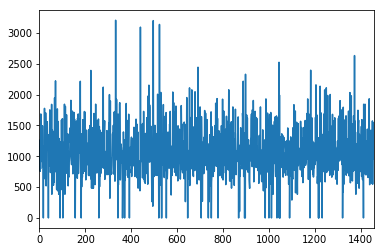

In [174]:
df_train.TotalBsmtSF_range.plot()

In [175]:
feature = 'TotalBsmtSF'
max_value = df_train[[feature]].max()[0]
min_value = df_train[[feature]].min()[0]

df_train[feature+'_range'] = df_train.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

**Fill NaN in test set**

In [176]:
df_test.TotalBsmtSF.isna().sum()

1

In [177]:
df_test.TotalBsmtSF.fillna(df_test.TotalBsmtSF.mean(), inplace=True)

In [178]:
feature = 'TotalBsmtSF'
max_value = df_test[[feature]].max()[0]
min_value = df_test[[feature]].min()[0]

df_test[feature+'_range'] = df_test.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

In [179]:
df_train.drop('TotalBsmtSF', axis=1, inplace=True)
df_test.drop('TotalBsmtSF', axis=1, inplace=True)

## 3.40 Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [180]:
df_train.Heating.value_counts(dropna=False)

GasA     1426
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

**Remove as it gives no new information**

In [181]:
df_train.drop('Heating', axis=1, inplace=True)
df_test.drop('Heating', axis=1, inplace=True)

In [182]:
f = open("data/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 4. Analysis

## 4.1 Correlation Matrix

In [183]:
cols = df_train.columns.tolist()
n = int(cols.index('SalePrice'))
cols =  cols[:n] + cols[n+1:] + [cols[n]]
df_train = df_train[cols]

In [184]:
corr_mat = df_train.corr()

In [185]:
corr_mat[corr_mat['SalePrice'].abs().sort_values(ascending=False) > 0.4]

/Users/bjornar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinSF2_range,BsmtUnfSF_range,TotalBsmtSF_range,SalePrice
OverallQual,-0.028531,0.168342,1.000000,-0.091528,0.411108,0.477221,0.295918,-0.030459,0.593667,0.112134,...,0.004850,-0.075095,-0.002000,-0.047036,-0.082872,0.192522,-0.061395,0.301414,0.493056,0.792692
MasVnrArea,-0.049498,0.155002,0.411108,-0.129936,1.000000,0.343890,0.172786,-0.069109,0.389813,0.089318,...,-0.000232,-0.022075,-0.049884,-0.029753,-0.022322,0.076067,-0.068910,0.107571,0.344288,0.476810
1stFlrSF,0.013404,0.394927,0.477221,-0.144803,0.343890,1.000000,-0.202073,-0.013930,0.565356,0.240069,...,0.018860,-0.007143,0.008053,0.026679,0.042066,-0.033446,0.091668,0.312232,0.773268,0.604042
GrLivArea,0.010232,0.368518,0.593667,-0.080651,0.389813,0.565356,0.688500,0.135032,1.000000,0.032614,...,0.014483,-0.041045,-0.016269,-0.021992,-0.017765,0.069061,-0.015159,0.231638,0.414658,0.708303
FullBath,0.007261,0.156720,0.551271,-0.195033,0.275877,0.379538,0.422076,-0.000514,0.629530,-0.067847,...,-0.018879,-0.068454,-0.024243,-0.035280,-0.065881,0.086385,-0.081125,0.282119,0.298904,0.560216
TotRmsAbvGrd,0.028321,0.272067,0.427525,-0.057659,0.280648,0.408842,0.617361,0.131356,0.825565,-0.056013,...,0.015603,-0.033168,-0.035594,-0.018690,-0.030110,0.050397,-0.038768,0.245918,0.263959,0.533438
Fireplaces,-0.015335,0.313648,0.399136,-0.025652,0.248183,0.407299,0.196185,-0.020839,0.460309,0.131661,...,0.022681,-0.011124,0.015975,-0.000411,0.038037,0.010060,0.039135,0.048569,0.311716,0.464095
GarageYrBlt,-0.001390,-0.003546,0.548059,-0.323967,0.253051,0.235889,0.070890,-0.036525,0.232807,0.127434,...,-0.015704,-0.040605,-0.001104,-0.066117,-0.083660,0.133736,-0.085245,0.192009,0.295609,0.489781
GarageCars,0.017246,0.229048,0.600996,-0.186152,0.364224,0.439530,0.184121,-0.094413,0.467145,0.131636,...,0.011600,-0.040912,0.002512,-0.032890,-0.042319,0.084629,-0.040380,0.213435,0.404246,0.641281
GarageArea,0.017642,0.284734,0.562316,-0.151299,0.373943,0.490704,0.138822,-0.067604,0.469573,0.179228,...,0.025975,-0.011122,-0.014260,-0.016801,-0.017710,0.053153,-0.018730,0.182581,0.463027,0.625065


In [186]:
correlated_cols = list(corr_mat[corr_mat.SalePrice.abs()>0.5].index)
#correlated_cols.append('Id')
correlated_cols

['OverallQual',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'Age',
 'YearsSinceRemod',
 'ExterQual_TA',
 'Foundation_PConc',
 'BsmtQual_Ex',
 'TotalBsmtSF_range',
 'SalePrice']

In [187]:
corr_mat[correlated_cols].loc[correlated_cols]

,OverallQual,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Age,YearsSinceRemod,ExterQual_TA,Foundation_PConc,BsmtQual_Ex,TotalBsmtSF_range,SalePrice
OverallQual,1.000000,0.477221,0.593667,0.551271,0.427525,0.600996,0.562316,-0.572544,-0.551388,-0.647102,0.568752,0.470950,0.493056,0.792692
1stFlrSF,0.477221,1.000000,0.565356,0.379538,0.408842,0.439530,0.490704,-0.283408,-0.242967,-0.315119,0.200389,0.379198,0.773268,0.604042
GrLivArea,0.593667,0.565356,1.000000,0.629530,0.825565,0.467145,0.469573,-0.199788,-0.288094,-0.386639,0.294931,0.310834,0.414658,0.708303
FullBath,0.551271,0.379538,0.629530,1.000000,0.554516,0.469514,0.405922,-0.469080,-0.440255,-0.467251,0.463795,0.238067,0.298904,0.560216
TotRmsAbvGrd,0.427525,0.408842,0.825565,0.554516,1.000000,0.362128,0.337878,-0.095893,-0.192587,-0.243195,0.193757,0.240997,0.263959,0.533438
GarageCars,0.600996,0.439530,0.467145,0.469514,0.362128,1.000000,0.882630,-0.538138,-0.421276,-0.482407,0.454412,0.356687,0.404246,0.641281
GarageArea,0.562316,0.490704,0.469573,0.405922,0.337878,0.882630,1.000000,-0.478988,-0.372575,-0.446322,0.389259,0.370302,0.463027,0.625065
Age,-0.572544,-0.283408,-0.199788,-0.469080,-0.095893,-0.538138,-0.478988,1.000000,0.593536,0.589922,-0.651272,-0.319278,-0.366772,-0.525154
YearsSinceRemod,-0.551388,-0.242967,-0.288094,-0.440255,-0.192587,-0.421276,-0.372575,0.593536,1.000000,0.564609,-0.570211,-0.286290,-0.260852,-0.510137
ExterQual_TA,-0.647102,-0.315119,-0.386639,-0.467251,-0.243195,-0.482407,-0.446322,0.589922,0.564609,1.000000,-0.621780,-0.333526,-0.337812,-0.591781


In [188]:
corr_mat_plot = pd.merge(corr_mat[correlated_cols].loc[correlated_cols].reset_index(), corr_mat['SalePrice'][correlated_cols].reset_index(), on='index').set_index('index')

In [189]:
corr_mat_plot

,OverallQual,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Age,YearsSinceRemod,ExterQual_TA,Foundation_PConc,BsmtQual_Ex,TotalBsmtSF_range,SalePrice_x,SalePrice_y
index,,,,,,,,,,,,,,,
OverallQual,1.000000,0.477221,0.593667,0.551271,0.427525,0.600996,0.562316,-0.572544,-0.551388,-0.647102,0.568752,0.470950,0.493056,0.792692,0.792692
1stFlrSF,0.477221,1.000000,0.565356,0.379538,0.408842,0.439530,0.490704,-0.283408,-0.242967,-0.315119,0.200389,0.379198,0.773268,0.604042,0.604042
GrLivArea,0.593667,0.565356,1.000000,0.629530,0.825565,0.467145,0.469573,-0.199788,-0.288094,-0.386639,0.294931,0.310834,0.414658,0.708303,0.708303
FullBath,0.551271,0.379538,0.629530,1.000000,0.554516,0.469514,0.405922,-0.469080,-0.440255,-0.467251,0.463795,0.238067,0.298904,0.560216,0.560216
TotRmsAbvGrd,0.427525,0.408842,0.825565,0.554516,1.000000,0.362128,0.337878,-0.095893,-0.192587,-0.243195,0.193757,0.240997,0.263959,0.533438,0.533438
GarageCars,0.600996,0.439530,0.467145,0.469514,0.362128,1.000000,0.882630,-0.538138,-0.421276,-0.482407,0.454412,0.356687,0.404246,0.641281,0.641281
GarageArea,0.562316,0.490704,0.469573,0.405922,0.337878,0.882630,1.000000,-0.478988,-0.372575,-0.446322,0.389259,0.370302,0.463027,0.625065,0.625065
Age,-0.572544,-0.283408,-0.199788,-0.469080,-0.095893,-0.538138,-0.478988,1.000000,0.593536,0.589922,-0.651272,-0.319278,-0.366772,-0.525154,-0.525154
YearsSinceRemod,-0.551388,-0.242967,-0.288094,-0.440255,-0.192587,-0.421276,-0.372575,0.593536,1.000000,0.564609,-0.570211,-0.286290,-0.260852,-0.510137,-0.510137


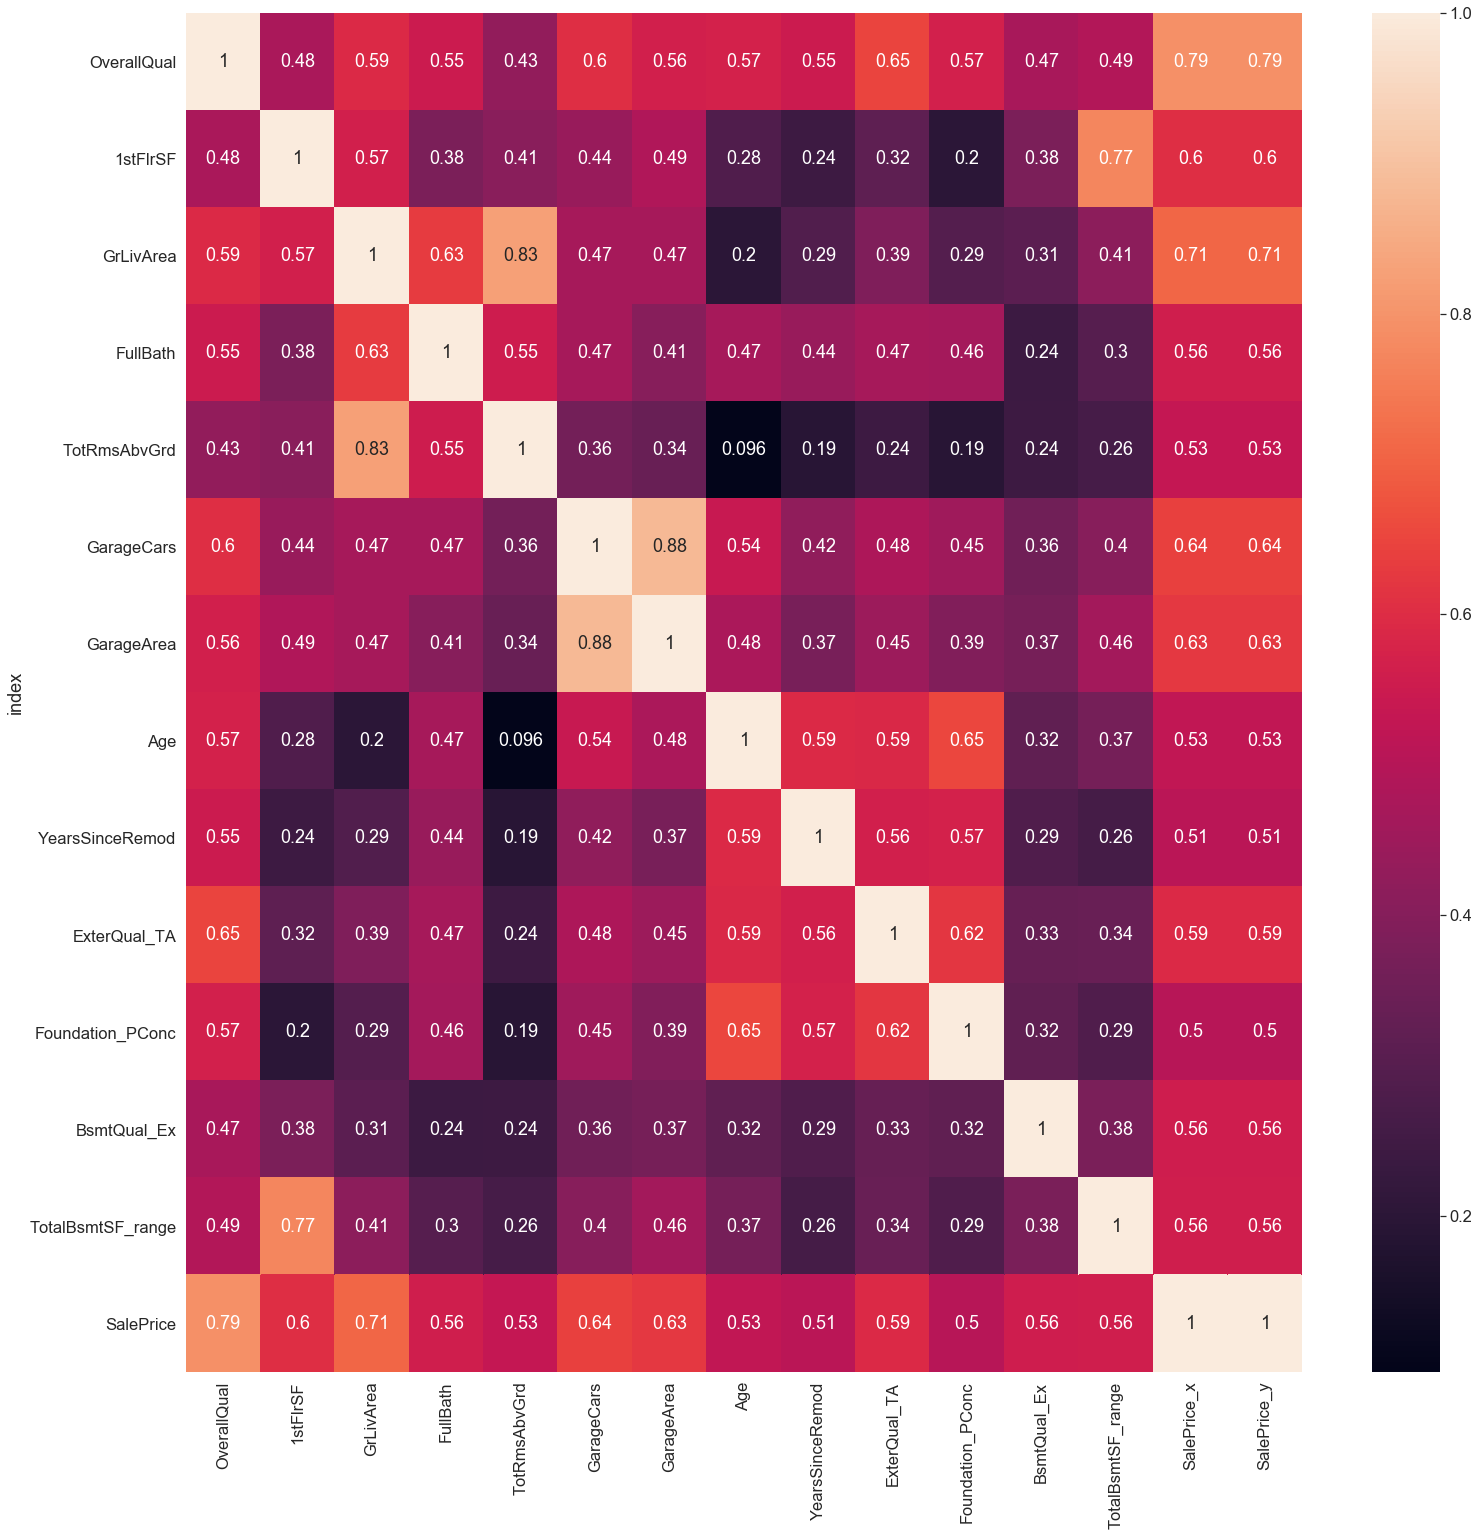

In [190]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = sns.heatmap(abs(corr_mat_plot), annot=True)


## 4.2 Boruta Feature Selection

In [191]:
X_train = df_train.copy()[correlated_cols].drop("SalePrice", axis=1).interpolate(method='ffill')
Y_train = df_train.copy()["SalePrice"]

In [192]:
def run_boruta():
    # load X and y
    # NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
    X = X_train.values
    y = Y_train.ravel()

    # define random forest classifier, with utilising all cores and
    # sampling in proportion to y labels
    rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

    # define Boruta feature selection method
    feat_selector = BorutaPy(rf, n_estimators='auto', verbose=10, random_state=1)

    # find all relevant features - 5 features should be selected
    feat_selector.fit(X, y)

    # check selected features - first 5 features are selected
    feat_selector.support_

    # check ranking of features
    feat_selector.ranking_

    # call transform() on X to filter it down to selected features
    X_filtered = feat_selector.transform(X)
    
#run_boruta()

In [193]:
#feat_selector.support_

In [194]:
#X_train.columns[feat_selector.support_]

In [195]:
#df_boruta = df_train[[X_train.columns[feat_selector.support_][0], 'SalePrice']]

In [196]:
#df_boruta.head()

# 5. Prediction

## Random Forest

In [197]:
X_train = df_train.copy().interpolate(method='ffill')[correlated_cols].drop("SalePrice", axis=1)
Y_train = df_train["SalePrice"]
correlated_cols.remove('SalePrice')
X_test  = df_test.copy()[correlated_cols].interpolate()
X_train.shape, Y_train.shape, X_test.shape

((1457, 13), (1457,), (1459, 13))

In [198]:
X_train.isna().interpolate().sum()

OverallQual          0
1stFlrSF             0
GrLivArea            0
FullBath             0
TotRmsAbvGrd         0
GarageCars           0
GarageArea           0
Age                  0
YearsSinceRemod      0
ExterQual_TA         0
Foundation_PConc     0
BsmtQual_Ex          0
TotalBsmtSF_range    0
dtype: int64

In [199]:
X_train.isna().sum()

OverallQual          0
1stFlrSF             0
GrLivArea            0
FullBath             0
TotRmsAbvGrd         0
GarageCars           0
GarageArea           0
Age                  0
YearsSinceRemod      0
ExterQual_TA         0
Foundation_PConc     0
BsmtQual_Ex          0
TotalBsmtSF_range    0
dtype: int64

In [200]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [201]:
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.9

# XGBoost

model = xgboost.train({"learning_rate": 0.5}, xgboost.DMatrix(X_train, label=Y_train), 10)

fit model no training data
model = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train[['OverallQual', 'YearBuilt']], Y_train, verbose=True)

print(model)

xgb_model = XGBRegressor().fit(X_train[['OverallQual', 'YearBuilt']], Y_train)
predictions = xgb_model.predict(X_test)
actuals = Y_test
print(mean_squared_error(actuals, predictions))

# 7. Submit results

In [202]:
submission = pd.DataFrame({ "Id": df_test["Id"], "SalePrice": Y_pred
                          }).set_index('Id')

In [203]:
submission.to_csv('submission.csv')

In [204]:
---

SyntaxError: invalid syntax (<ipython-input-204-29e0c3615294>, line 1)

# 8. Explain model

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_train)

In [ ]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values)

In [ ]:
shap.dependence_plot(0, shap_values, X_train)